In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

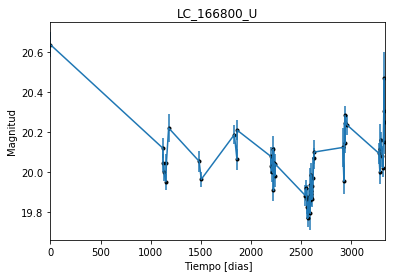

In [2]:
data = np.genfromtxt('LC_166800_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_166800_U')
plt.savefig("LC_166800_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

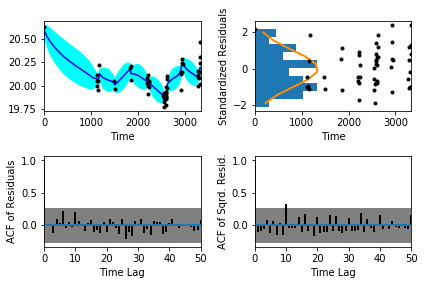

In [5]:
sample.assess_fit()

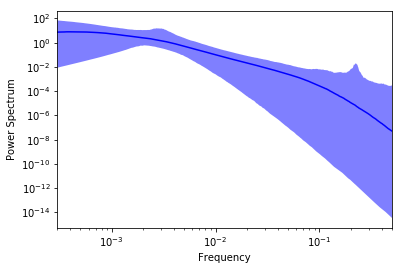

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

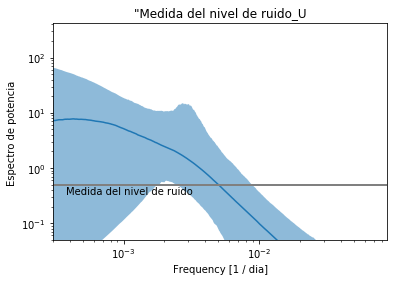

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_166800_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_166800_U')

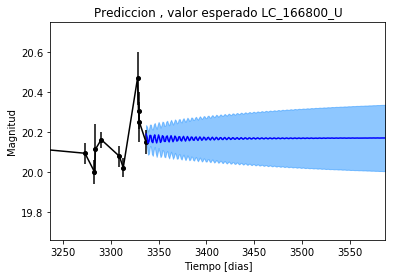

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_166800_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_166800_U')

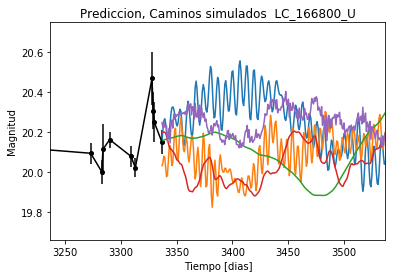

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_166800_U')

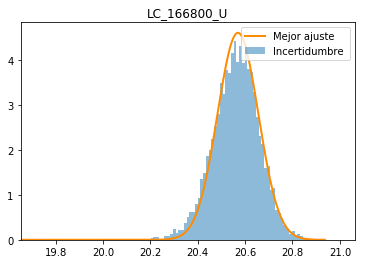

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_166800_U')
plt.savefig("Mejor_ajuste_LC_166800_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_166800_U')

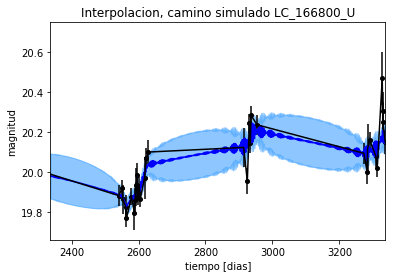

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_U')

Text(0.5,1,'Interpolacion, camino simulado LC_166800_U')

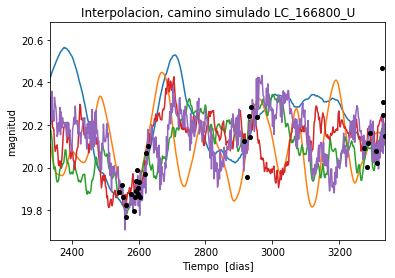

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 575.999899852
Median: 0.0148064430648
Standard deviation: 0.186156833813
68% credibility interval: [ 0.00159068  0.17522125]
95% credibility interval: [  3.67931436e-04   7.41676842e-01]
99% credibility interval: [  3.07239820e-04   9.68601326e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 759.745787217
Median: 0.00732620729395
Standard deviation: 0.086803397823
68% credibility interval: [ 0.00077537  0.05873751]
95% credibility interval: [ 0.0003394   0.29155771]
99% credibility interval: [  3.04104235e-04   5.20960269e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 889.312353406
Median: 0.0397342836051
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 611.987828385
Median: 65.13084136
Standard deviation: 1.8066523732
68% credibility interval: [ 63.31442729  66.52536106]
95% credibility interval: [ 60.80502827  68.27269415]
99% credibility interval: [ 58.90317885  69.14713303]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 794.48727249
Median: 0.881435616162
Standard deviation: 2.32718548683
68% credibility interval: [ 0.1114957   4.34116532]
95% credibility interval: [ 0.02496116  8.01394972]
99% credibility interval: [  0.0131268   10.48533738]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 957.431257338
Median: 1.55234727321
Standard deviation: 10.0158090212
68% credibility interval: [  0.06954198  12.76895985]
95% credibility interval: [  2.60005241e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 14161.0041564
Median: 1.91573207388e-10
Standard deviation: 2.46971683504e+65
68% credibility interval: [  1.72612113e-48   3.16003436e+35]
95% credibility interval: [  6.39415588e-139   4.52682316e+057]
99% credibility interval: [  5.90077726e-148   9.55064404e+061]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1577.22393067
Median: 20.1412965975
Standard deviation: 0.0953009138784
68% credibility interval: [ 20.07073932  20.23854316]
95% credibility interval: [ 20.00074166  20.37513958]
99% credibility interval: [ 19.92766263  20.48512472]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 827.470337559
Median: 0.104179480389
Standard deviation: 0.253960673116
68% credibility interval: [ 0.         0.4689841]
95% credibility interval: [ 0.          0.88032751]
99% credibility interval: [ 0.         0.9891205]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 827.470337559
Median: 0.104179480389
Standard deviation: 0.253960673116
68% credibility interval: [ 0.         0.4689841]
95% credibility interval: [ 0.          0.88032751]
99% credibility interval: [ 0.         0.9891205]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 443.924097927
Median: 0.0
Standard deviation: 0.00116267002631
68% credibility i

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 611.987828385
Median: 65.13084136
Standard deviation: 1.8066523732
68% credibility interval: [ 63.31442729  66.52536106]
95% credibility interval: [ 60.80502827  68.27269415]
99% credibility interval: [ 58.90317885  69.14713303]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1407.35457987
Median: 0.0405070735306
Standard deviation: 0.0340889664174
68% credibility interval: [ 0.02465919  0.07242274]
95% credibility interval: [ 0.01639573  0.1338456 ]
99% credibility interval: [ 0.01274774  0.19865183]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 743.058625958
Median: 1.19906859494
Standard deviation: 0.245034023429
68% credibility interval: [ 0.97067361  1.46899538]
95% credibility interval: [ 0.80691574  1.74947186]
99% credibility interval: [ 0.69342279  1.9132089 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 758.275054957
Median: 0.000248237731876
Standard deviation: 0.415535829355
68% credibility interval: [  4.43728515e-38   7.87759255e-02]
95% credibility interval: [  6.09032972e-60   1.29929282e+00]
99% credibility interval: [  8.45643598e-65   2.81284027e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 575.999899852
Median: (-0.0930316255166-3.13960387352j)
Standard deviation: 1.97845912581
68% credibility interval: [-1.10094758-2.7405223j  -0.00999454-3.83953277j]
95% credibility interval: [ -4.66009303e+00-5.75790584j  -2.31178140e-03-0.01721993j]
99% credibility interval: [ -6.08590162e+00+0.j          -1.93044472e-03-0.01674268j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 759.745787217
Median: (-0.0460319180267+4.86248460221j)
Standard deviation: 1.68631672869
68% credibility interval: [-0.36905867+4.03422779j -0.00487179+0.j        ]
95% credibility interval: [-1.8319111+0.8494265j -0.0021325+0.j       ]
99% credibility interval: [ -3.27328991e+00 +6.12793116e+00j  -1.91074326e-03 +2.48121201e-03j]
Posterio